In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt

import post_processing

In [2]:
object_type = "plunger"
original_resolution = 232

path_predictions = os.path.join("..", "results", "predictions")

path_output = os.path.join("..", "results", "figures")

frame_number = 269

color_overlay = (241, 90, 96)

figure_width_in_cm = 16
figure_height_in_cm = 3.5

text_size = 8

dpi = 320

In [3]:
path_image = os.path.join(path_predictions, object_type, "img", f"{frame_number}.jpg")

path_mask_all_classes = os.path.join(path_predictions, object_type, "cluster", f"{frame_number}.png")

path_mask_binary = os.path.join(path_predictions, object_type, "masks_binary", f"{frame_number}.png")

path_mask_binary_dilated = os.path.join(path_predictions, object_type, "masks_binary_dilated", f"{frame_number}.png")

In [9]:
image_original = post_processing.load_image_rgb(filepath=path_image)

mask_all_classes = post_processing.load_image_rgb(filepath=path_mask_all_classes)

mask_binary = post_processing.load_image_rgb(filepath=path_mask_binary)

mask_binary_dilated = post_processing.load_image_rgb(filepath=path_mask_binary_dilated)

In [12]:
image_original = post_processing.resize_image(image=image_original, target_resolution=original_resolution)

mask_all_classes = post_processing.resize_image(image=mask_all_classes, target_resolution=original_resolution)

In [13]:
image_overlay = post_processing.draw_mask_on_image(
    image=image_original,
    mask=mask_binary,
    color=color_overlay,
)

image_overlay_dilated = post_processing.draw_mask_on_image(
    image=image_original,
    mask=mask_binary_dilated,
    color=color_overlay,
)

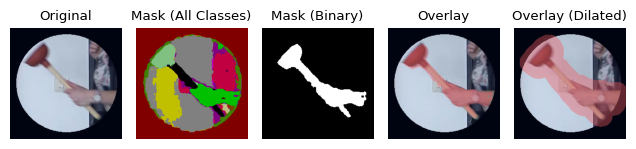

In [14]:
data_images = pd.DataFrame({
    "image": [
        image_original,
        mask_all_classes,
        mask_binary,
        image_overlay,
        image_overlay_dilated,
    ],
    "title": [
        "Original",
        "Mask (All Classes)",
        "Mask (Binary)",
        "Overlay",
        "Overlay (Dilated)",
    ],
})

plt.rcParams["font.size"] = text_size

figure, axes = plt.subplots(ncols=len(data_images), layout="constrained")

figure.set_size_inches(figure_width_in_cm / 2.54, figure_height_in_cm / 2.54)

for index, row in data_images.iterrows():
    axes[index].imshow(row["image"])
    axes[index].set_axis_off()
    axes[index].set_title(row["title"])

In [15]:
figure.savefig(
    fname=os.path.join(path_output, f"{object_type}_{frame_number}"),
    dpi=dpi,
)